1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [4]:
import numpy as np
from numpy import random
from scipy.stats import poisson
from math import sqrt, pi, erf
import matplotlib.pyplot as plt

# We are interested in the probability of observing more than 15 hurricanes  in a single year (mathematically: 𝑘>15)
k = np.arange(0, 16)
mu = 6.3
var = 6.3
x0 = 15
#Probability mass function
pmf = poisson.pmf(k, mu)
pmf = sum(pmf)
pmf = 1-pmf # p(k>15) = 1- p(k<=15)
print('The probability to observe more than 15 hurricanes in a year is:', pmf)

# determine the Z score
Z = abs(x0 - mu) / sqrt(var)
print("Z =", Z)
# Z-score is larger than 3 so The number of 15 hurricanes obtained in 2005 is significantly different.

The probability to observe more than 15 hurricanes in a year is: 0.0008444930803587214
Z = 3.4661629670697414


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [14]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre) 
sample1_mean = np.mean(pre)
sample2_mean = np.mean(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_1**2 + sigma_2**2)/2)
# calculate the test statistics
T = (sample1_mean - sample2_mean) / (sigma / np.sqrt(2/n))
print("T =", abs(T)

#Here our degree of freedom, 
# ddl = 10-1 = 9
# Using the degree of freedom value as 9 and a 5% level of significance, a look at the t-value distribution 
# table gives a value of 2.263
# Here, abs(T) < 2.101, so the difference of blood pressure is not significant.

# Indeed, a large t-score indicates that the groups are different while a small t-score indicates that the groups are 
# similar

T = -0.7573995876275257


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Maximum temperatures: 

parameters:
 [ 27.62925851 -10.63955647  -0.22590566]
covariance matrix:
 [[ 0.09004797 -0.01373836  0.00029333]
 [-0.01373836  0.1667012   0.00058178]
 [ 0.00029333  0.00058178  0.00523888]]

 Minimum temperatures: 

parameters:
 [-37.71075225 -25.20712457  -0.65355893]
covariance matrix:
 [[ 0.96601538 -0.13838164  0.00376442]
 [-0.13838164  1.82294746  0.00701028]
 [ 0.00376442  0.00701028  0.00984569]]


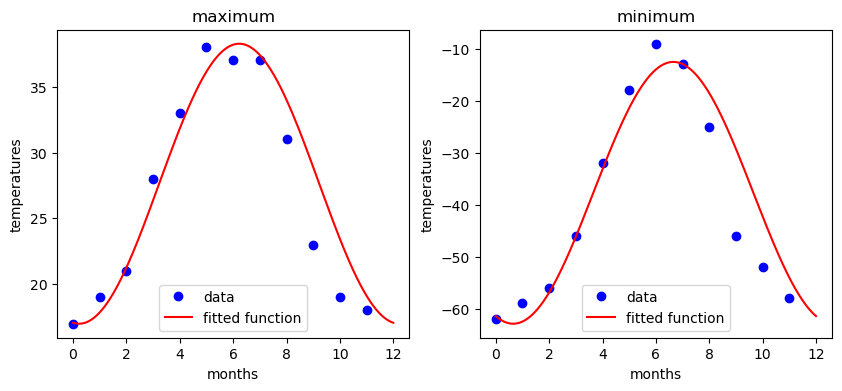

In [167]:
maxi=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mini=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

x = np.arange(12)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, maxi, 'bo', label='data')
plt.title('maximum')
plt.xlabel('months')
plt.ylabel('temperatures')
plt.subplot(1, 2, 2)
plt.plot(x, mini, 'bo', label='data')
plt.title('minimum')
plt.xlabel('months')
plt.ylabel('temperatures')

# The Gaussian function can describe well the maximum and minimum temperatures 

from scipy import optimize

#Gaussian function
def f(months, avg, ampl, offset):
    return (avg + ampl * np.cos((months+offset)* 2 * np.pi / months.max()))

# Average of the minimum plot : 20
# Amplitude of the minimum plot: 10
# Average of the maximum plot : -40
# Amplitude of the minimum plot: 20
res_max, cov_max = optimize.curve_fit(f, x, maxi, [20, 10, 0],full_output=False)
res_min, cov_min = optimize.curve_fit(f, x, mini, [-40, 20, 0],full_output=False)

print('Maximum temperatures: \n')
print("parameters:\n", res_max)
print("covariance matrix:\n", cov_max)
print('\n Minimum temperatures: \n')
print("parameters:\n", res_min)
print("covariance matrix:\n", cov_min)

days = np.linspace(0, 12, num=365)
plt.subplot(1, 2, 1)
plt.plot(days, f(days, *res_max), 'r-', label='fitted function')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(days, f(days, *res_min), 'r-', label='fitted function')
plt.legend(loc='best')

# The fit is reasonable because the function covers well the points plot of each temperatures samples.
# The offset is the same (equal to 0).

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [78]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
    

--2022-12-31 14:08:29--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6023:18::a27d:4312, 162.125.67.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6023:18::a27d:4312|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-31 14:08:29--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5cfe603ba248d07274c4815b5.dl.dropboxusercontent.com/cd/0/inline/BzqTK__cIkYPnWG9PjIDAAUH8Lz9gR2nBuxBEdXH-wUikbj99WikQy_6APAmyLC8skmZGSHTb2APAJTM5idVMSoPFz75m53YGSeuYpYxc8iZ3LiWOBk4qf0XVWE5G_LJupWQIqWb1oOE7iILq7l7SQNHoRtOzCh9NIxIzZIvOSJtcA/file# [following]
--2022-12-31 14:08:29--  https://uca5cfe603ba248d07274c4815b5.dl.dropboxusercontent.com/cd/0/inline/BzqTK__cIkYPnWG9PjIDAAUH8Lz9gR2nBuxBEdXH-wUikb

In [5]:
import pickle
#infile = open('data/residuals_261.pkl', 'rb')
data =  np.load('data/residuals_261.pkl', allow_pickle=True)
#data = pickle.load(infile)
infile.close()
#residual = data['residuals']
print(data.shape)
print(data['residuals'])
#for i in data:
   # print(i)
#data = dict(data)

#print(type(data['residuals']))


()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [113]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-02 10:01:53--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6023:18::a27d:4312, 162.125.67.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6023:18::a27d:4312|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-02 10:01:53--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0420c291552cda9791bfb6fa42.dl.dropboxusercontent.com/cd/0/inline/BzzBvTQW4hyasNgoFzigTJDwKugECs0290dzntiyd-1MlPuTz6aCYlPhKfLhHpDrb86GeEMdAPe6vJon-7UTRK-XCAA6ajz47QJEcfdRqJ9yuMwYeFpvmr5aRYui547unXwLhL1fCBUL1up4O2sjOPBeN3BVGCeAMmREPui3vAGKRA/file# [following]
--2023-01-02 10:01:54--  https://uc0420c291552cda9791bfb6fa42.

The overall average of the temperatures between 2008 and 2012 is:  9.254051149780702
365
The daily average predicted by the model for the hottest time of year is:  19.003194791790005
The daily average predicted by the model for the coldest time of year is:  -12.358907975010624


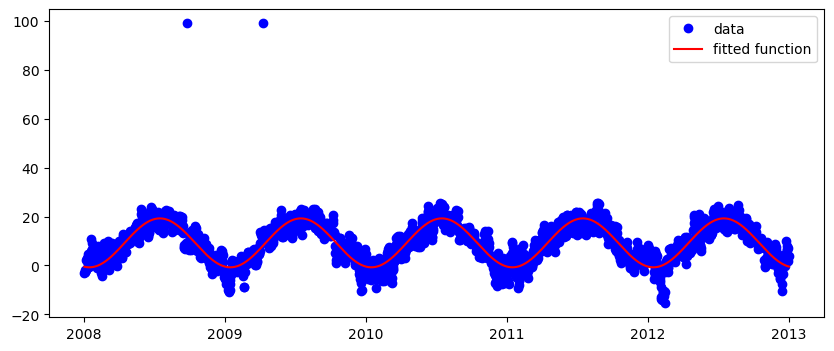

In [327]:
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t+b) +c

data = np.loadtxt('munich_temperatures_average_with_bad_data.txt')
mask = [(i[0]>=2008 and i[0]<2013) for i in data]
data_selected = data[mask]

plt.figure(figsize=(10, 4))
x = np.array([data_selected[i][0] for i in range(len(data_selected))]) #year
y = np.array([data_selected[i][1] for i in range(len(data_selected))]) #temperature       
plt.plot(x, y, 'bo', label='data')

# Let's remove the two values equal to 99 that represent a noise
a = [i for i in range(len(y)) if y[i] == 99]
x1 = np.delete(np.delete(x, a[1]), a[0])
y1 = np.delete(np.delete(y, a[1]), a[0])

# The best fit values of the parameters 
res_max, cov_max = optimize.curve_fit(f, x1, y1, [20, 10, 0],full_output=False)
plt.plot(x1, f(x1, *res_max), 'r-', label='fitted function')
plt.legend(loc='best')

avg= np.average(y1)
print('The overall average of the temperatures between 2008 and 2012 is: ',avg)

# We noticed thanks to the plot that the hottest time of year is around a year and half so the month of June
# and the coldest is around the change of the year so January.
print(len([x for x in data_selected if 2008<x[0]<2009]))
hot_times = [i for i in x1 if 0.4<(i-int(i))%10<0.5] # jours les plus chauds
cold_times = [i for i in x1 if (i-int(i))%10<0.1] # jours les plus froids
#print(np.average(f(hot_times,20,10,0)))
val_hot = [f(i,20,10,0) for i in hot_times]
val_cold = [f(i,20,10,0) for i in cold_times]

print('The daily average predicted by the model for the hottest time of year is: ',np.average(val_hot))
print('The daily average predicted by the model for the coldest time of year is: ',np.average(val_cold))

# The change of parameter b makes the function moving horizontally (if b>0, the function is moving to the left 
# and the opposite for b<0)


The RSS for f is:  387147.2147432893
The RSS for g is:  8145820.991492655
Test f vs g:
p-value: 1.000 , additional parameter necessary: NO


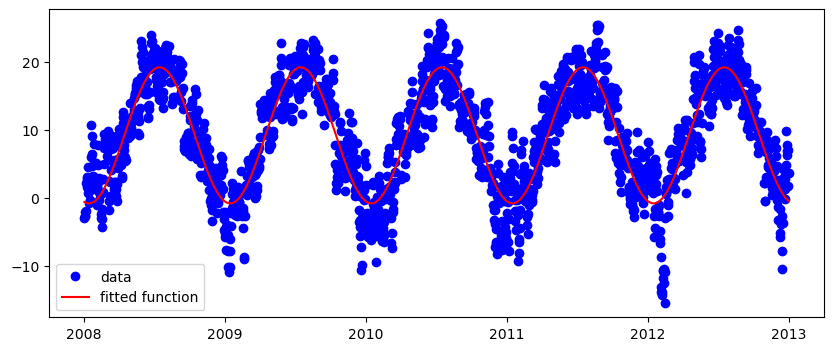

In [340]:
from scipy import stats

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t+c) +d

res_max, cov_max = optimize.curve_fit(g, x1, y1, [200, 1, 10, 0],full_output=False)
plt.figure(figsize=(10, 4))
plt.plot(x1, y1, 'bo', label='data')
plt.plot(x1, g(x1, *res_max), 'r-', label='fitted function')
plt.legend(loc='best')

# RSS
# For f:
y2_f = f(x1 ,20, 10, 0)
ssr_f = np.sum((y2_f - y1)**2)
y2_g = g(x1, 100, 1, 10, 0)
ssr_g = np.sum((y2_g - y1)**2)
print('The RSS for f is: ', ssr_f)
print('The RSS for g is: ', ssr_g)
# They have the exact same value
ndof_f = 3 - 1 # n of parameters - 1
ndof_g = 4 - 1 # n of parameters - 1
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
N= 100
alpha = 0.05
print("Test f vs g:")
pval_f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N,  True)

